## Assignment

#### Predict presidential election voting, with two features you choose!
- Start a new notebook.
- You may reuse one of the features from the "Bread & Peace" model.
- **Acquire data for at least one new feature.** The links below may help!
- Commit your notebook to your fork of the GitHub repo.

#### Why I'm asking you to acquire data for at least one new [feature](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### You can search [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/) for these keywords
- real disposable income change annual
- gdp change annual
- unemployment 

#### Go to [BEA (Bureau of Economic Analysis)](https://apps.bea.gov/itable/) and follow these steps
- National Data - GDP & Personal Income
- Begin using the data
- Section 1 - DOMESTIC PRODUCT AND INCOME
- Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
- Modify
  - First Year: 1947
  - Last Year: 2018
  - Series: Annual
  - Refresh Table
- Download

#### Go to Wikipedia, [United States military casualties of war, Wars ranked by total number of U.S. military deaths](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths)
- You can try this tutorial to scrape data from HTML tables: [Quick Tip: The easiest way to grab data out of a web page in Python](https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58)

#### Read more about economic features to predict elections
- [Which Economic Indicators Best Predict Presidential Elections?](https://fivethirtyeight.blogs.nytimes.com/2011/11/18/which-economic-indicators-best-predict-presidential-elections/)
- [What stat best gets at the question, "Are you better off now than you were a year ago?"](https://www.theatlantic.com/business/archive/2010/11/the-most-important-economic-indicator-in-midterm-elections/65505/)
- [Time for change model](https://pollyvote.com/en/components/econometric-models/time-for-change-model/)


#### You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
- [Tyler Vigen, Spurious Correlations, Discover a Correlation](https://tylervigen.com/discover)
- [CDC (Centers for Disease Control), Compressed Mortality data](https://wonder.cdc.gov/mortSQL.html)
- [Data Is Plural](https://tinyletter.com/data-is-plural)
- [Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/)
- [Campaign Finance Institute, Historical Stats](http://www.cfinst.org/data/historicalstats.aspx)
- Or find your own data and features to try!

In [38]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [39]:
#Load data


columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

In [40]:
columns = ['Year', 'Coal Production']

data = [[1952, 507.4],
        [1956, 529.8],
        [1960, 434.3],
        [1964, 504.2],
        [1968, 556.7],
        [1972, 602.5],
        [1976, 684.9],
        [1980, 829.7],
        [1984, 895.9],
        [1988, 950.3],
        [1992, 997.5],
        [1996, 1063.9],
        [2000, 1074],
        [2004, 1112],
        [2008, 1172],
        [2012, 1016],
        [2016, 739]]

coal = pd.DataFrame(data=data, columns=columns)

In [59]:
psav = pd.read_csv('PSAVERT.csv')
psav = psav.rename(columns={'DATE':'Year'})

In [60]:
psav.head()

,Year,PSAVERT
0,1952,11.0
1,1956,10.4
2,1960,12.5
3,1964,11.1
4,1968,13.7


In [61]:
#Merge data 
df = votes.merge(growth).merge(deaths).merge(coal).merge(psav)

In [62]:
#Baselines
target = 'Incumbent Party Vote Share'
df['Mean Baseline'] = df[target].mean()
df['Error'] = df['Mean Baseline'] - df[target]
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Coal Production,PSAVERT,Mean Baseline,Error
0,1952,Stevenson,Eisenhower,44.60,2.40,190,507.4,11.0,52.055,7.455
1,1956,Eisenhower,Stevenson,57.76,2.89,0,529.8,10.4,52.055,-5.705
2,1960,Nixon,Kennedy,49.91,0.85,0,434.3,12.5,52.055,2.145
3,1964,Johnson,Goldwater,61.34,4.21,1,504.2,11.1,52.055,-9.285
4,1968,Humphrey,Nixon,49.60,3.02,146,556.7,13.7,52.055,2.455
5,1972,Nixon,McGovern,61.79,3.62,0,602.5,10.6,52.055,-9.735
6,1976,Ford,Carter,48.95,1.08,2,684.9,11.4,52.055,3.105
7,1980,Carter,Reagan,44.70,-0.39,0,829.7,11.2,52.055,7.355
8,1984,Reagan,Mondale,59.17,3.86,0,895.9,8.3,52.055,-7.115
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,950.3,10.6,52.055,-1.885


In [63]:
target = 'Incumbent Party Vote Share'
features = ['PSAVERT']

for year in df['Year']: 
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparameters by instantiating this class
    model = LinearRegression()
    # Arrange data into X features matrix and y target vector
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Absolute Error on prediction for {year} = {mae}')

Fit Linear Regression on all years except 1952
Absolute Error on prediction for 1952 = 7.747050189337031
Fit Linear Regression on all years except 1956
Absolute Error on prediction for 1956 = 6.334584643497031
Fit Linear Regression on all years except 1960
Absolute Error on prediction for 1960 = 1.6989546416885872
Fit Linear Regression on all years except 1964
Absolute Error on prediction for 1964 = 10.519146804586057
Fit Linear Regression on all years except 1968
Absolute Error on prediction for 1968 = 1.9011766442236038
Fit Linear Regression on all years except 1972
Absolute Error on prediction for 1972 = 10.74998594853352
Fit Linear Regression on all years except 1976
Absolute Error on prediction for 1976 = 2.9510153767486074
Fit Linear Regression on all years except 1980
Absolute Error on prediction for 1980 = 7.632907380310307
Fit Linear Regression on all years except 1984
Absolute Error on prediction for 1984 = 7.38779423907711
Fit Linear Regression on all years except 1988
Absol

In [68]:
model = LinearRegression()

target = 'Incumbent Party Vote Share'
features = ['Coal Production']

X = df[features]
y = df[target]

model.fit(X, y)

y_pred = model.predict(X)

df['Linear Regression, 1 feature'] = y_pred
df['Error'] = df['Linear Regression, 1 feature'] - df[target]
df['Absolute Error'] = df['Error'].abs()

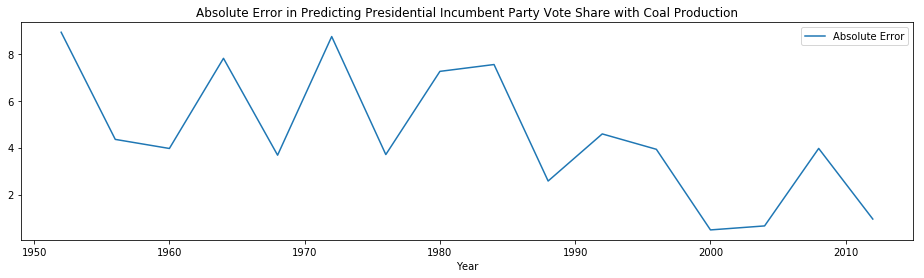

In [69]:
ax = df.plot(x='Year',y='Absolute Error',figsize=(16,4))
plt.title('Absolute Error in Predicting Presidential Incumbent Party Vote Share with Coal Production');